# Fetch the data

Get necessary files

In [52]:
import glob

In [53]:
# Get only the files from the data dir
file_paths = glob.glob("./data/*.pack.table")

In [54]:
def extract_filename(fp):
    """
    Takes a filepath and gives you only the filename without the extension
    """
    base=os.path.basename(fp)
    return base.split(".")[0]

In [55]:
file_stubs = [extract_filename(name) for name in file_paths]

Read it into a pandas dataframe

In [56]:
import pandas as pd

In [57]:
def read_coverage_table(fp):
    """
    Call pandas.read_csv on a file
    """
    return pd.read_csv(fp,  sep='\t', lineterminator='\n')

In [58]:
cov_tables = [read_coverage_table(f) for f in file_paths]

Visualize the data frame

In [125]:
coverage_vectors = pd.DataFrame([cov_tables[i]["coverage"] for i in range(len(file_paths))], 
                                index=file_stubs)
coverage_vectors

,0,1,2,3,4,5,6,7,8,9,...,196479,196480,196481,196482,196483,196484,196485,196486,196487,196488
H_504_02_04,15,15,15,14,15,15,15,17,17,17,...,0,0,0,0,0,0,0,0,0,0
H_504_26_03,20,20,21,21,21,20,21,20,21,21,...,115,114,115,115,115,114,114,114,114,114
H_506_23_04,213,222,261,263,262,263,263,263,264,262,...,0,0,0,0,0,0,0,0,0,0
H_506_09_04,78,78,78,80,80,80,80,80,76,80,...,0,0,0,0,0,0,0,0,0,0
H_518_19_03,93,95,96,96,98,98,97,99,98,96,...,0,0,0,0,0,0,0,0,0,0
H_525_02_04,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
H_506_30_04,124,125,132,133,133,133,133,134,134,130,...,1196,1196,1197,1194,1194,1167,1144,1142,1140,1139
H_535_05_04,47,48,51,52,53,53,53,53,52,52,...,0,0,0,0,0,0,0,0,0,0
H_513_13_04,296,299,299,304,304,304,303,305,304,306,...,0,0,0,0,0,0,0,0,0,0
H_513_30_03,29,30,30,30,30,30,31,31,31,31,...,0,0,0,0,0,0,0,0,0,0


# Visualize the coverages

In [17]:
import matplotlib.pyplot as plt

In [147]:
def log_10(x):
    if x == 0: 
        return x 
    else:
        return log(x, 10)

Rainbow plot

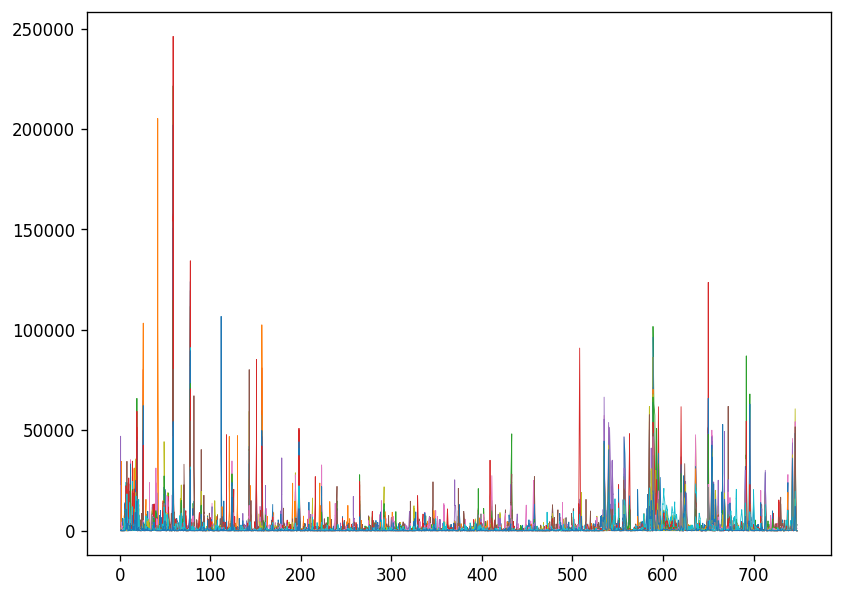

In [149]:
plt.figure(num=None, figsize=(8, 6), dpi=120)

for i in range(len(file_paths)):
    sample = cov_tables[i]
    plt.plot(sample['node.id'], sample['coverage'], linewidth=0.5)

Scatter plot

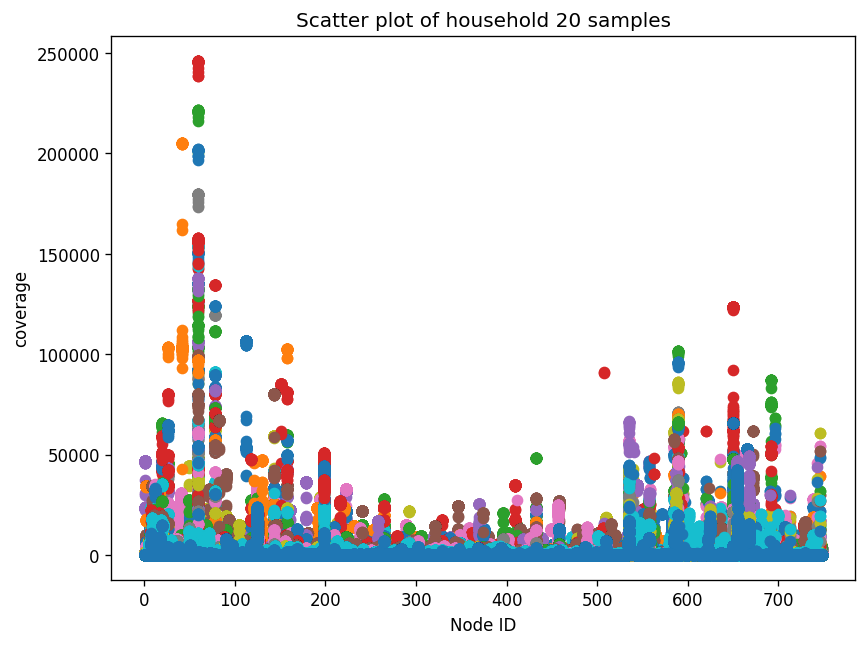

In [146]:
from math import log
plt.figure(num=None, figsize=(8, 6), dpi=120)

"""
For each sample
for i in range(len(file_paths)):
    sample = cov_tables[i]
    plt.scatter(sample['node.id'], sample['coverage'])
    
    stub = file_stubs[i]
    plt.title('{} vs Coverage'.format(stub))
    plt.xlabel('{}'.format(stub))
    plt.ylabel('coverage')
    plt.show()
"""

for i in range(len(file_paths)):
    sample = cov_tables[i]
    plt.scatter(sample['node.id'], sample['coverage'])
    
    stub = file_stubs[i]
    plt.title('Scatter plot of household 20 samples'.format(stub))
    plt.xlabel("Node ID")
    plt.ylabel('coverage')

# PCA

Scale

In [62]:
from sklearn.preprocessing import StandardScaler
comb_scaled = StandardScaler().fit_transform(coverage_vectors)

Perform PCA

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(comb_scaled)
# display(principalComponents)
pcaDataFrame = pd.DataFrame(principalComponents, columns = ["principal component 1"], index=file_stubs)
pcaDataFrame

,principal component 1
H_504_02_04,-29.685755
H_504_26_03,-194.426766
H_506_23_04,167.793347
H_506_09_04,-106.932546
H_518_19_03,103.481329
H_525_02_04,-114.482907
H_506_30_04,-106.154920
H_535_05_04,106.489761
H_513_13_04,-128.606430
H_513_30_03,-217.356244


Visualize PCA results in a scatter plot

In [68]:
import numpy as np
colorArray = np.random.rand(len(file_paths),)

Text(0, 0.5, 'principal component')

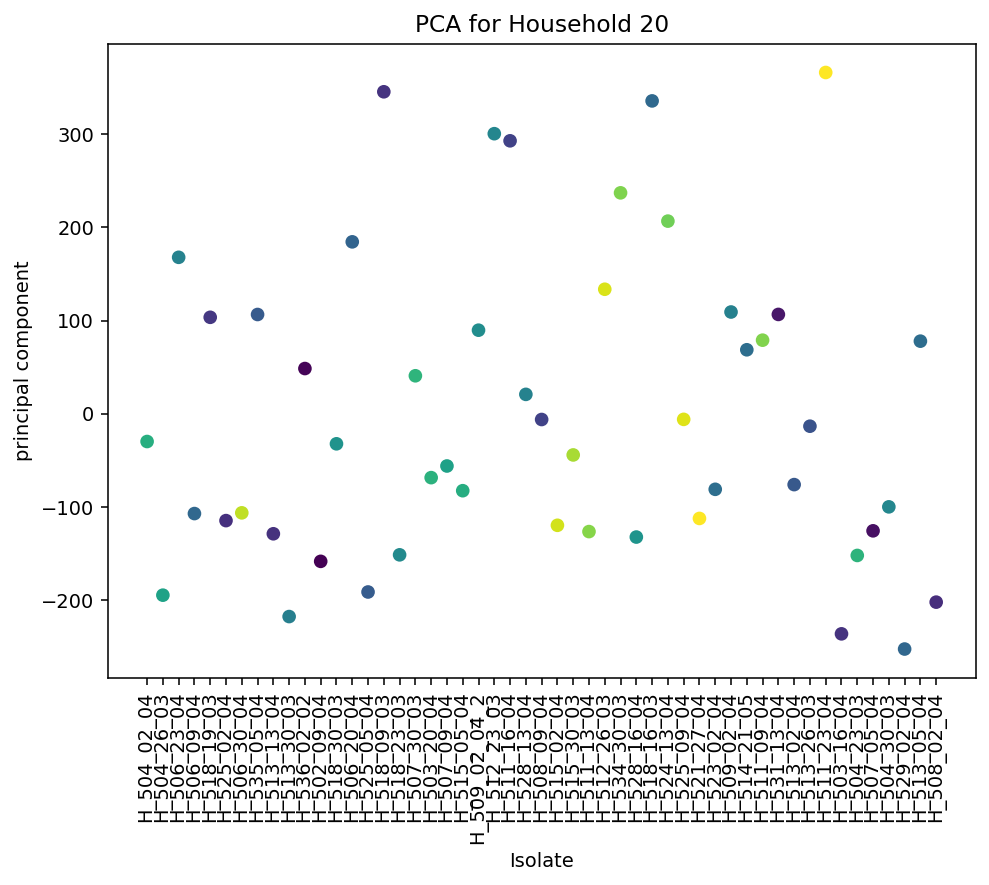

In [151]:
plt.figure(num=None, figsize=(8, 6), dpi=140, facecolor='w', edgecolor='k')
plt.scatter(file_stubs, pcaDataFrame['principal component 1'], c=colorArray) 

# targets = ['isolate_0', 'isolate_1']
# plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.title('PCA for Household 20')
plt.xlabel('Isolate')
plt.xticks(rotation=90)
plt.ylabel('principal component')

# Distance matrix

In [70]:
from scipy.spatial import distance_matrix
df = pcaDataFrame
distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
distance_matrix

,H_504_02_04,H_504_26_03,H_506_23_04,H_506_09_04,H_518_19_03,H_525_02_04,H_506_30_04,H_535_05_04,H_513_13_04,H_513_30_03,...,H_513_02_04,H_513_26_03,H_511_23_04,H_503_16_04,H_504_23_03,H_507_05_04,H_504_30_03,H_529_02_04,H_513_05_04,H_508_02_04
H_504_02_04,0.000000,164.741011,197.479102,77.246791,133.167084,84.797152,76.469165,136.175516,98.920675,187.670489,...,46.198455,16.412316,395.638862,206.199457,122.151055,95.752207,70.054224,222.487747,107.587797,172.213580
H_504_26_03,164.741011,0.000000,362.220113,87.494220,297.908095,79.943859,88.271846,300.916527,65.820336,22.929478,...,118.542556,181.153327,560.379873,41.458446,42.589956,68.988804,94.686787,57.746736,272.328808,7.472569
H_506_23_04,197.479102,362.220113,0.000000,274.725893,64.312019,282.276254,273.948268,61.303586,296.399777,385.149591,...,243.677557,181.066786,198.159760,403.678559,319.630157,293.231309,267.533326,419.966849,89.891306,369.692682
H_506_09_04,77.246791,87.494220,274.725893,0.000000,210.413875,7.550361,0.777626,213.422307,21.673884,110.423698,...,31.048336,93.659107,472.885653,128.952666,44.904264,18.505416,7.192567,145.240956,184.834588,94.966789
H_518_19_03,133.167084,297.908095,64.312019,210.413875,0.000000,217.964235,209.636249,3.008432,232.087758,320.837573,...,179.365538,116.754768,262.471779,339.366541,255.318138,228.919290,203.221308,355.654830,25.579287,305.380664
H_525_02_04,84.797152,79.943859,282.276254,7.550361,217.964235,0.000000,8.327986,220.972667,14.123523,102.873337,...,38.598697,101.209468,480.436014,121.402305,37.353903,10.955055,14.742927,137.690595,192.384948,87.416428
H_506_30_04,76.469165,88.271846,273.948268,0.777626,209.636249,8.327986,0.000000,212.644681,22.451509,111.201324,...,30.270711,92.881481,472.108028,129.730292,45.681889,19.283041,6.414941,146.018581,184.056962,95.744415
H_535_05_04,136.175516,300.916527,61.303586,213.422307,3.008432,220.972667,212.644681,0.000000,235.096191,323.846005,...,182.373970,119.763200,259.463347,342.374973,258.326571,231.927723,206.229740,358.663263,28.587719,308.389096
H_513_13_04,98.920675,65.820336,296.399777,21.673884,232.087758,14.123523,22.451509,235.096191,0.000000,88.749814,...,52.722220,115.332991,494.559537,107.278782,23.230380,3.168468,28.866451,123.567072,206.508471,73.292905
H_513_30_03,187.670489,22.929478,385.149591,110.423698,320.837573,102.873337,111.201324,323.846005,88.749814,0.000000,...,141.472035,204.082805,583.309352,18.528968,65.519434,91.918282,117.616265,34.817258,295.258286,15.456909


# Neighbour joining

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
from matplotlib.pyplot import figure

In [90]:
# Condense the distance matrix
condensed = pdist(distance_matrix)

In [91]:
Z = linkage(condensed)

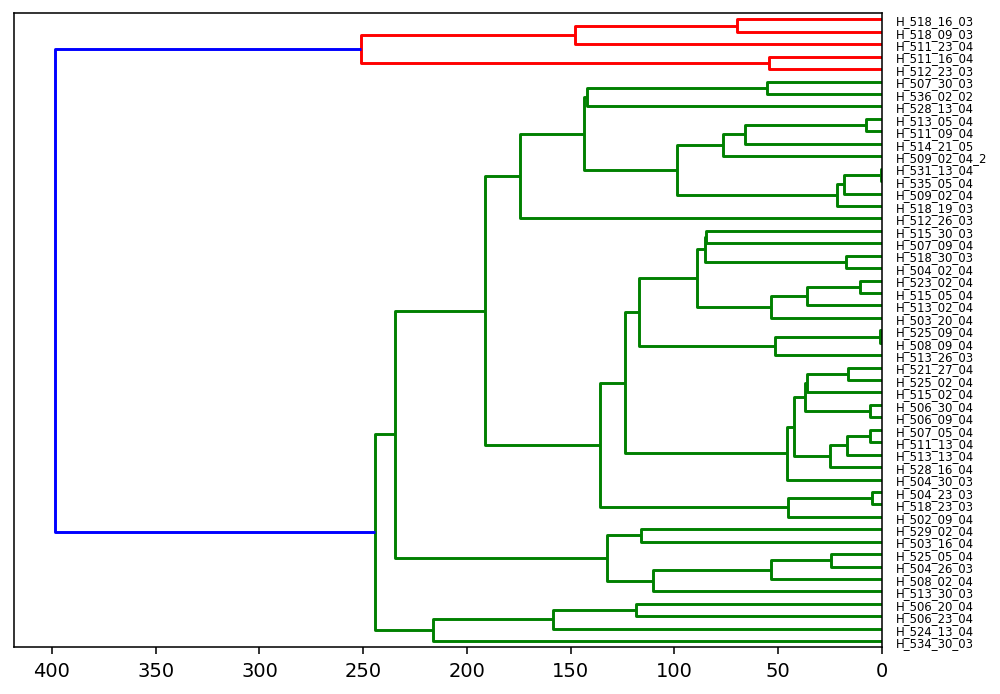

In [150]:
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=140)

dendrogram(Z, labels=file_stubs,  orientation='left')
plt.show()